<a href="https://colab.research.google.com/github/anthonybonbon/Isca/blob/master/Courseworkfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Coursework 1: Loktab Volterra Section
# Description, underlying assumptions and explanation of each term


The Lotka-Volterra Model was developed by mathematicians Alfred James Lotka and Vito Volterra in around 1925 to 1926. It is a simple model that describes the interactions between prey and predator populations (1). The most popular example is the lynx and snowshoe hare data of the Hudson's Bay Company. The following are the initial two equations for prey (H) and predator (y) (2).

\begin{align*}
\frac{\mathrm{d} H}{\mathrm{d} t} &= \alpha H - \beta H L \; ,\\
\frac{\mathrm{d} L}{\mathrm{d} t} &= \delta H L - \gamma L \; ,
\end{align*}

When utilising this model, the following assumptions are in effect.


1.  Prey population is not limited by food constraints
2.  The food supply of predator population relies soley on prey population
3.  Rate of change of both populations are proportional to their sizes
4.  Limitless appetite for predators
5.  The control environment does not favour either populations during the process and genetical adaptions are not considered





The parameters are as follows:


*   **H** is the number of prey (Hare)
*   **L** is the number of predator (Lynx)
*   **t** is time
*   **αH** represents exponential poulation growth for Hare.
*   **βHL** represents the rate of predation, i.e. the rate which Hare and Lynx meet and the success of predation.
*   **δHL** represents population growth of Lynx. A different constant, δ, is used as the growth rate is not equal to rate of prey consumption  
*   **γL** represents the loss rate of population of Lynx due to natural death or emigration











# Analysis of equilibrium points and their stability
To investigate the equilibrium points and their stability, the following code is produced.

In [2]:
# Parameters
alpha = 0.1
beta = 0.02
gamma = 0.4
delta = 0.02
dt = 0.01


In [3]:
#Finding Equilibrium Points
import sympy as sp
# Define symbolic variables
H, L = sp.symbols('H L')

# Define the Lotka-Volterra equations
equation1 = sp.Eq(alpha * H - beta * H * L, 0)
equation2 = sp.Eq(delta * H * L - gamma * L, 0)

# Solve for equilibrium points (H_eq, L_eq)
equilibrium_points = sp.solve((equation1, equation2), (H, L))

print("Equilibrium points:")
for point in equilibrium_points:
    H_eq, L_eq = point
    print(f"H = {H_eq:.2f}, L = {L_eq:.2f}")


Equilibrium points:
H = 0.00, L = 0.00
H = 20.00, L = 5.00


The equilibrium points can help one find the stability of the model by finding the eigenvalues of the Jacobian Matrix (need more). If both eigenvalues are negative and positive, the stability of the model is unstable and populations of prey and predator has an equilibrium point that diverge from it over time.

In [4]:
import numpy as np
# Define the symbolic variables
H, L = sp.symbols('H L')

# Define the Lotka-Volterra equations as a function
def equations(H, L):
    equation1 = alpha * H - beta * H * L
    equation2 = delta * H * L - gamma * L
    return [equation1, equation2]

# Calculate the Jacobian of the equations with respect to H and L
Jacobian = sp.Matrix([[sp.diff(equation, var) for var in (H, L)] for equation in equations(H, L)])

# Convert the symbolic Jacobian matrix to a numerical matrix
Jacobian_numeric = Jacobian.subs({H: equilibrium_points[0][0], L: equilibrium_points[0][1]}).evalf()

# Calculate the eigenvalues
eigenvalues = sp.solve(Jacobian.charpoly().as_expr(), sp.symbols('lambda'))

from scipy.linalg import eigvals

# Convert the symbolic Jacobian matrix to a numerical matrix
Jacobian_numeric = np.array(Jacobian_numeric).astype(float)

# Calculate the eigenvalues numerically
eigenvalues = eigvals(Jacobian_numeric)

# Convert the eigenvalues to floats
eigenvalues = [float(eigenvalue) for eigenvalue in eigenvalues]

print("Jacobian Matrix:")
print(Jacobian_numeric)
print("Eigenvalues:", eigenvalues)

Jacobian Matrix:
[[ 0.1  0. ]
 [ 0.  -0.4]]
Eigenvalues: [0.1, -0.4]


<ipython-input-4-131dd9786304>:29: ComplexWarning: Casting complex values to real discards the imaginary part
  eigenvalues = [float(eigenvalue) for eigenvalue in eigenvalues]


The Jacobian Matrix shows how pertubations affect the change in the populations. As the eigenvalues are 0.1 (positive), and -0.4 (negative), they are real values and there is at least one positive value, which means it is an unstable equilibrium .

# Disretisation of model using a finite difference method:

Different disretisations can be used to produce results for the model, such as the Forward Euler method, Modified Euler method, Runge-Kutta method and Implicit Methods with Advanced Solvers.  

The different methods relates to the stiffness of the ordinary differential equations (ODEs). ODEs that are considered to be stiff have high rates of variable change and often have complex environments, leading to challenges such as the need for small time steps, consideration for instability and high computational costs.(3)

The Lotka-Volterra Predation model is considered as a non stiff ODE because the time scales are consistent and the calculation of the rates of population change is relatively simple. (3)

Therefore, the Modified euler method is selected here because it is simple and easy to implement, is considered to be one of the best ways to showcase a non-stiff ODE. It is also explicit, meaning that for each new time step, a new solution is created, which enhances the accuracy of the results.



In [5]:
# Initial conditions
t = 1847  # Initial time
t_run = 500  # Total simulation time
t_max = t + t_run  # Maximum time
Hi = 21  # Initial prey population
Li = 49  # Initial predator population

# Lists to store data
time = []
hare = []
lynx = []

# Time-stepping loop using Modified Euler method
while t < t_max:
    # Append current values to lists
    time.append(t)
    hare.append(Hi)
    lynx.append(Li)

    # Calculate intermediate values using the Lotka-Volterra equations
    dHi_dt = (alpha * Hi - beta * Hi * Li) * dt
    dLi_dt = (delta * Hi * Li - gamma * Li) * dt

    Hi_mid = Hi + dHi_dt
    Li_mid = Li + dLi_dt

    # Calculate the values at the next time step using the intermediate values
    dHi_dt_mid = (alpha * Hi_mid - beta * Hi_mid * Li_mid) * dt
    dLi_dt_mid = (delta * Hi_mid * Li_mid - gamma * Li_mid) * dt

    Hi += 0.5 * (dHi_dt + dHi_dt_mid)
    Li += 0.5 * (dLi_dt + dLi_dt_mid)

    # Increment time
    t += dt

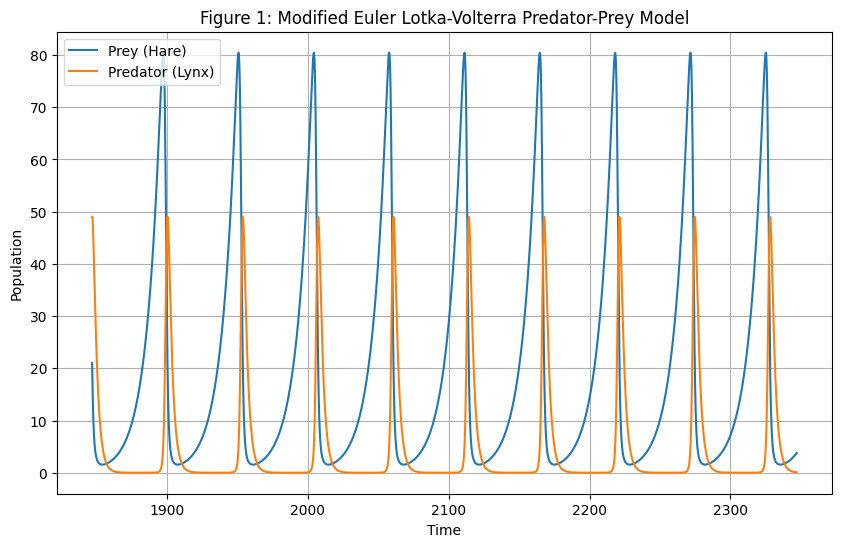

In [6]:
# Plot the results (Model Simulation)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(time, hare, label='Prey (Hare)')
plt.plot(time, lynx, label='Predator (Lynx)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Figure 1: Modified Euler Lotka-Volterra Predator-Prey Model')
plt.legend()
plt.grid()
plt.show()

Figure 1 shows the population of hare and lynx over a 500 year time span. With a modified Euler integration, the peaks of prey and lynx are equal through time, which expresses a balanced and equilibrium state. These are classic periodic, out-of-phase cycles, which shows period where lack of food lowers  predator abundance which in turn allows the prey to repopulate (4)

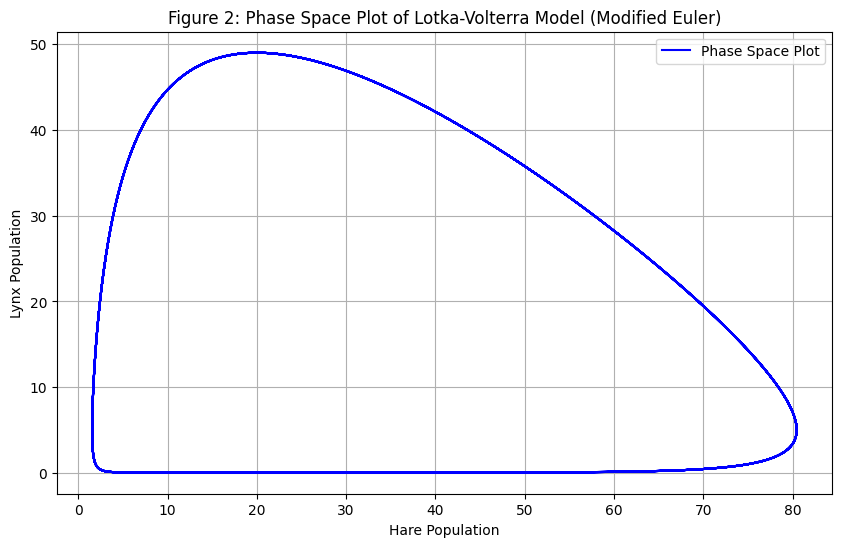

In [7]:
#Create Phase Space Plot
plt.figure(figsize=(10, 6))
plt.plot(hare, lynx, label='Phase Space Plot', color='blue')
plt.xlabel('Hare Population')
plt.ylabel('Lynx Population')
plt.title('Figure 2: Phase Space Plot of Lotka-Volterra Model (Modified Euler)')
plt.legend()
plt.grid()
plt.show()


This is a phase space plot for the model. The plot shows the trajectory of both poulations and show how they interact. For example, there is only a high abundace of hare when lynx predation is at its lowest.

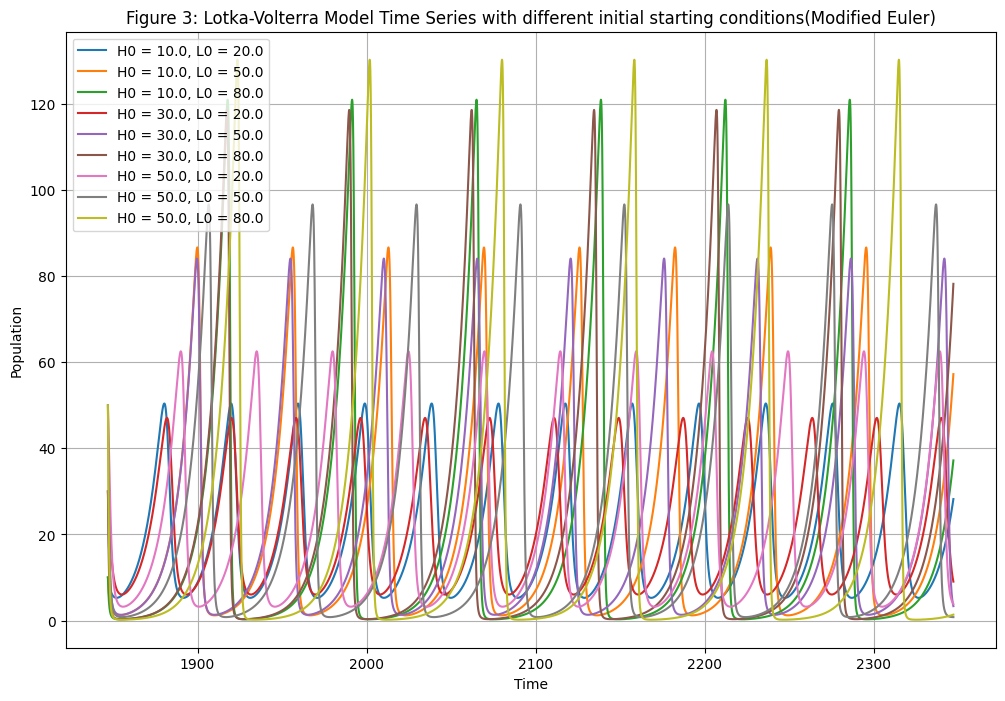

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Lotka-Volterra model parameters
alpha = 0.1
beta = 0.02
gamma = 0.4
delta = 0.02
dt = 0.01

# Initial time and simulation time
t = 1847  # Initial time
t_run = 500  # Total simulation time
t_max = t + t_run  # Maximum time

# Define a range of initial conditions for H0 and L0
initial_conditions_range = {
    'H0': np.linspace(10, 50, 3),  # Vary H0 from 10 to 50 with 3 values
    'L0': np.linspace(20, 80, 3)   # Vary L0 from 20 to 80 with 3 values
}

# Create a time array
time = np.arange(t, t_max + dt, dt)

# Create a single plot to display all time series
plt.figure(figsize=(12, 8))

# Loop through initial condition combinations and plot each combination separately
for H0 in initial_conditions_range['H0']:
    for L0 in initial_conditions_range['L0']:
        # Initialize lists to store results
        hare = [H0]
        lynx = [L0]

        # Time stepping loop with Modified Euler method
        H = H0
        L = L0
        for t in time[1:]:
            # Calculate intermediate values using the Lotka-Volterra equations
            dH_dt = (alpha * H - beta * H * L)
            dL_dt = (delta * H * L - gamma * L)

            H_mid = H + dH_dt * dt
            L_mid = L + dL_dt * dt

            # Calculate the values at the next time step using the intermediate values
            dH_mid_dt = (alpha * H_mid - beta * H_mid * L_mid)
            dL_mid_dt = (delta * H_mid * L_mid - gamma * L_mid)

            H_next = H + 0.5 * (dH_dt + dH_mid_dt) * dt
            L_next = L + 0.5 * (dL_dt + dL_mid_dt) * dt

            # Update Hi and Li for the next time step
            H = H_next
            L = L_next

            # Append values to lists
            hare.append(H)
            lynx.append(L)

        # Plot the time series for this initial condition combination
        plt.plot(time, hare, label=f'H0 = {H0}, L0 = {L0}')

# Add labels and legend to the plot
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Figure 3: Lotka-Volterra Model Time Series with different initial starting conditions(Modified Euler)')
plt.legend()

# Display the plot
plt.grid()
plt.show()

Here we are experiementing with different initial starting populations of lynx and hare. As one can see from figure 3, the environment with highest initial hare population and highest initial lynx population (H0= 50, L0 = 80) produce the highest populations overall.This is because with both high numbers of lynx and hare, the cumulative populations are also high. Surprisingly, when Ho = 10 and L0 = 80, it reached the second highest population number. This may be due the fact that when lynx population start very high, hare population goes to 0 for a while which completely destroys the lynx population. Hare population then gets a lot of recovery time to boom which directly links to a high population of lynx growth afterwardsm. This causes one moment where both hare and lynx population reach a high point, contributing to the high numbers.

# An extension of the Lotka-Volterra Model

Here we are adding hunters as a third species to the model.
The hunter population (M) would predate the lynx similar to how the lynx predate the hare. Other assumptions remain the same. Hunters only hunt lynx and do not hunt hare. The equations would be changed to the following:

\begin{align*}
\frac{\mathrm{d} H}{\mathrm{d} t} &= \alpha H - \beta H L \; ,\\
\frac{\mathrm{d} L}{\mathrm{d} t} &= \delta H L - \gamma L \ - e*L*M; ,\\
\frac{\mathrm{d} M}{\mathrm{d} t} &= eM L - fM \;
\end{align*}



The parameters are as follows:


*   **H** is the number of prey (Hare)
*   **L** is the number of predator (Lynx)
*   **M** is the number of hunters (Humans)
*   **e** is the success rate of hunters
*   **t** is time
*   **αH** represents exponential poulation growth for Hare.
*   **βHL** represents the rate of predation, i.e. the rate which Hare and Lynx meet and the success of predation.
*   **δHL** represents population growth of Lynx. A different constant, δ, is used as the growth rate is not equal to rate of prey consumption  
*   **γL** represents the loss rate of population of Lynx due to natural death or emigration
*   **fM** represents the loss rate of population of Lynx due to natural death or emigration



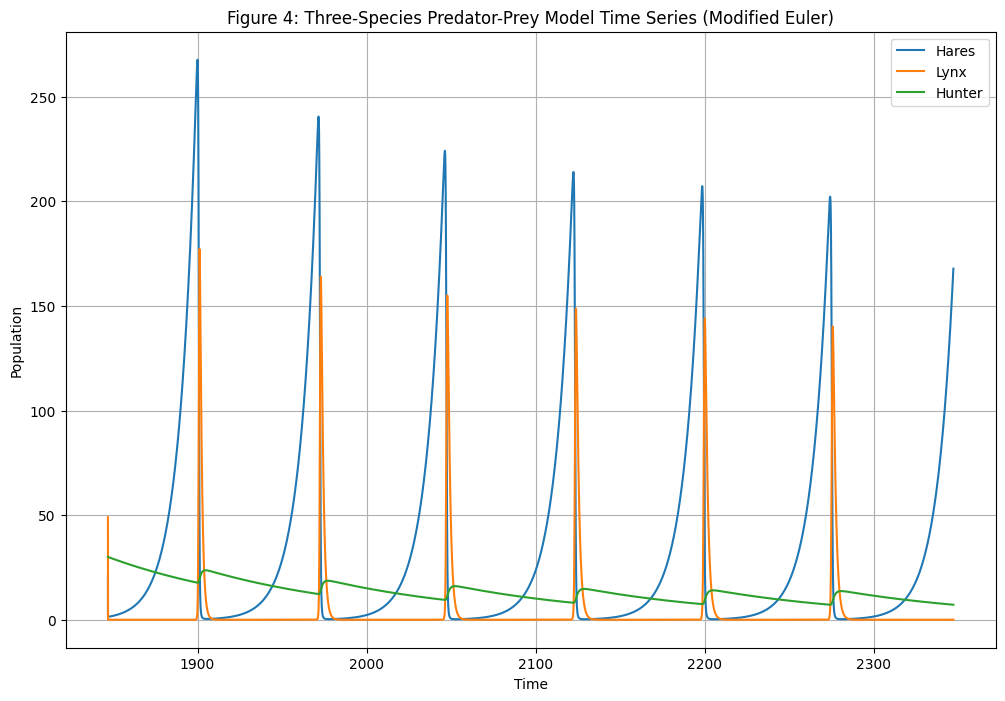

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Lotka-Volterra model parameters
alpha = 0.1
beta = 0.02
gamma = 0.4
delta = 0.02
dt = 0.01

# Additional parameters for the Hunter species
e = 0.02
f = 0.01

# Initial time and simulation time
t = 1847  # Initial time
t_run = 500  # Total simulation time
t_max = t + t_run  # Maximum time

# Fixed initial conditions
H0 = 21
L0 = 49
M = M0 = 30

# Create a time array
time = np.arange(t, t_max + dt, dt)

# Initialize lists to store results
hare = [H0]
lynx = [L0]
hunter = [M0]

for _ in time[1:]:
    dH_dt = (alpha * H - beta * H * L)
    dL_dt = (delta * H * L - gamma * L - e * L * M)  # Include hunter predation on lynx
    dM_dt = (e * L - f * M)

    H_mid = H + dH_dt * dt
    L_mid = L + dL_dt * dt
    M_mid = M + dM_dt * dt

    dH_mid_dt = (alpha * H_mid - beta * H_mid * L_mid)
    dL_mid_dt = (delta * H_mid * L_mid - gamma * L_mid - e * L_mid * M_mid)  # Include hunter predation on lynx
    dM_mid_dt = (e * L_mid - f * M_mid)

    H_next = H + 0.5 * (dH_dt + dH_mid_dt) * dt
    L_next = L + 0.5 * (dL_dt + dL_mid_dt) * dt
    M_next = M + 0.5 * (dM_dt + dM_mid_dt) * dt

    H = H_next
    L = L_next
    M = M_next

    hare.append(H)
    lynx.append(L)
    hunter.append(M)

# Plot the time series for e=0.02
plt.figure(figsize=(12, 8))
plt.plot(time, hare, label='Hares')
plt.plot(time, lynx, label='Lynx')
plt.plot(time, hunter, label='Hunter')

# Add labels and legend to the plot
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Figure 4: Three-Species Predator-Prey Model Time Series (Modified Euler)')
plt.legend()

# Display the plot
plt.grid()
plt.show()


From this plot, we can see that the hunter populations drops to a sustainable level of population of around 15. On the other hand, the populations of hares and lynx oscillates and drops each time from a peak instead of going back to its original peak. This may be due to the parameters of e and f. To investigate this, a parameter sensitivity test is conducted below.

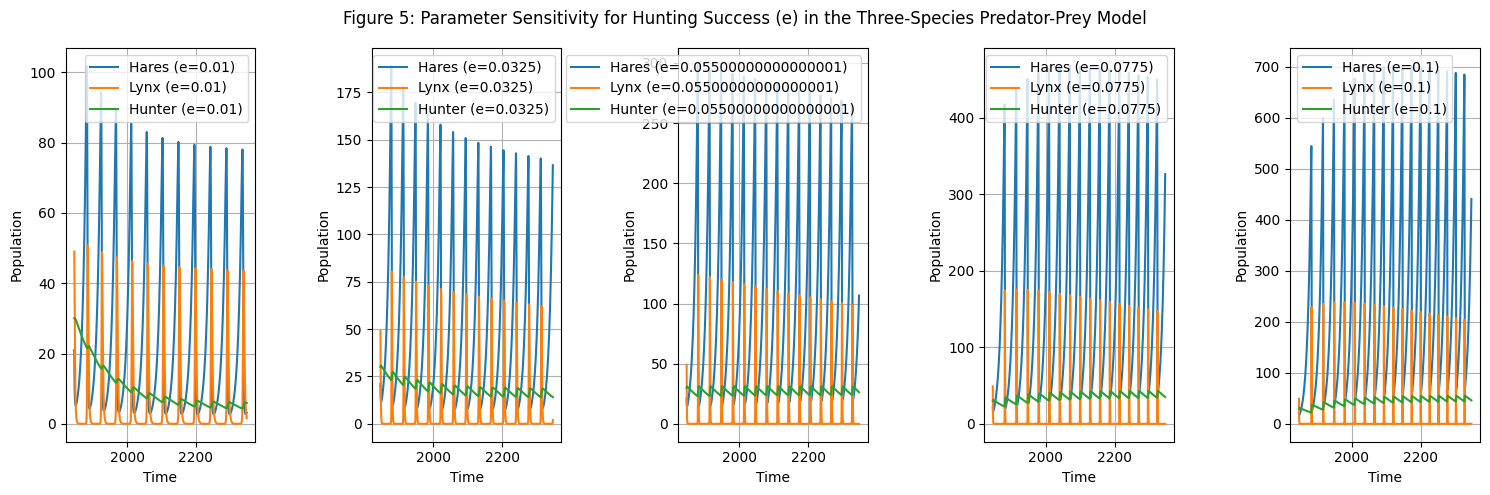

In [10]:

# Sensitivity analysis for the hunting success parameter (e)
e_values = np.linspace(0.01, 0.1, 5)  # Vary e from 0.01 to 0.1

# Set up subplots
fig, axes = plt.subplots(1, len(e_values), figsize=(15, 5))

for i, e in enumerate(e_values):
    H = H0
    L = L0
    M = M0

    time = np.arange(t, t_max + dt, dt)  # Generate a new time array for each e value
    hare = [H0]
    lynx = [L0]
    hunter = [M0]

    for _ in time[1:]:
        dH_dt = (alpha * H - beta * H * L)
        dL_dt = (delta * H * L - gamma * L - e * L * M)  # Include hunter predation on lynx
        dM_dt = (e * L - f * M)

        H_mid = H + dH_dt * dt
        L_mid = L + dL_dt * dt
        M_mid = M + dM_dt * dt

        dH_mid_dt = (alpha * H_mid - beta * H_mid * L_mid)
        dL_mid_dt = (delta * H_mid * L_mid - gamma * L_mid - e * L_mid * M_mid)  # Include hunter predation on lynx
        dM_mid_dt = (e * L_mid - f * M_mid)

        H_next = H + 0.5 * (dH_dt + dH_mid_dt) * dt
        L_next = L + 0.5 * (dL_dt + dL_mid_dt) * dt
        M_next = M + 0.5 * (dM_dt + dM_mid_dt) * dt

        H = H_next
        L = L_next
        M = M_next

        hare.append(H)
        lynx.append(L)
        hunter.append(M)

    # Plot the results for each e value on subplots
    ax = axes[i]
    ax.plot(time, hare, label=f'Hares (e={e})')
    ax.plot(time, lynx, label=f'Lynx (e={e})')
    ax.plot(time, hunter, label=f'Hunter (e={e})')
    ax.set_xlabel('Time')
    ax.set_ylabel('Population')
    ax.grid()
    ax.legend()
# Set a main title for the entire figure
fig.suptitle('Figure 5: Parameter Sensitivity for Hunting Success (e) in the Three-Species Predator-Prey Model')

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()


From changing the hunting success rate of hunters from a low 0.01 to 0.1, we can see that when hunting success rate is positively correlated with a higher population count for both lynx and hare populations. This may be attributed to the fact that hunting success correlates with the death rate of lynx population. With lower lynx populations at the beginning, hare populations would also increase greatly, which in turn increase the food sources of lynx which also boosts their population. However, both hare and lynx population show similar drops of peak populations to figure 4.

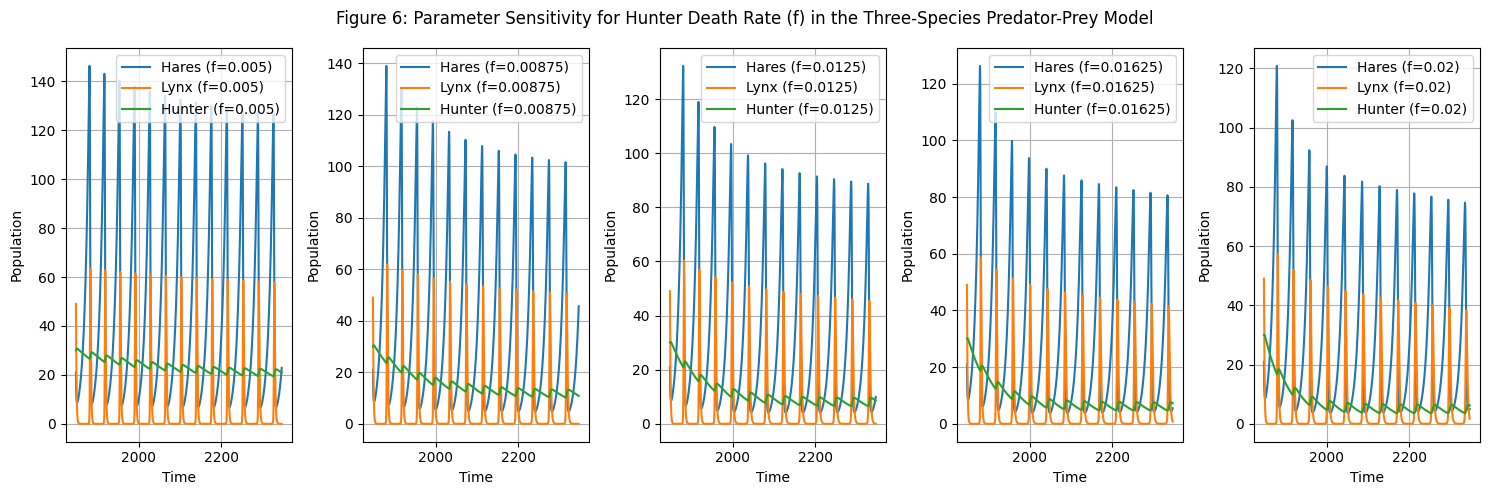

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Lotka-Volterra model parameters
alpha = 0.1
beta = 0.02
gamma = 0.4
delta = 0.02
dt = 0.01

# Additional parameters for the Hunter species
e = 0.02

# Initial time and simulation time
t = 1847  # Initial time
t_run = 500  # Total simulation time
t_max = t + t_run  # Maximum time

# Fixed initial conditions
H0 = 21
L0 = 49
M0 = 30

# Create a time array
time = np.arange(t, t_max + dt, dt)

# Sensitivity analysis for the hunter death rate parameter (f)
f_values = np.linspace(0.005, 0.02, 5)  # Vary f from 0.005 to 0.02

# Set up subplots
fig, axes = plt.subplots(1, len(f_values), figsize=(15, 5))

for i, f in enumerate(f_values):
    H = H0
    L = L0
    M = M0

    time = np.arange(t, t_max + dt, dt)  # Generate a new time array for each f value
    hare = [H0]
    lynx = [L0]
    hunter = [M0]

    for _ in time[1:]:
        dH_dt = (alpha * H - beta * H * L)
        dL_dt = (delta * H * L - gamma * L - e * L * M)
        dM_dt = (e * L - f * M)

        H_mid = H + dH_dt * dt
        L_mid = L + dL_dt * dt
        M_mid = M + dM_dt * dt

        dH_mid_dt = (alpha * H_mid - beta * H_mid * L_mid)
        dL_mid_dt = (delta * H_mid * L_mid - gamma * L_mid - e * L_mid * M_mid)
        dM_mid_dt = (e * L_mid - f * M_mid)

        H_next = H + 0.5 * (dH_dt + dH_mid_dt) * dt
        L_next = L + 0.5 * (dL_dt + dL_mid_dt) * dt
        M_next = M + 0.5 * (dM_dt + dM_mid_dt) * dt

        H = H_next
        L = L_next
        M = M_next

        hare.append(H)
        lynx.append(L)
        hunter.append(M)

    # Plot the results for each f value on subplots
    ax = axes[i]
    ax.plot(time, hare, label=f'Hares (f={f})')
    ax.plot(time, lynx, label=f'Lynx (f={f})')
    ax.plot(time, hunter, label=f'Hunter (f={f})')
    ax.set_xlabel('Time')
    ax.set_ylabel('Population')
    ax.grid()
    ax.legend()
# Set a main title for the entire figure
fig.suptitle('Figure 6: Parameter Sensitivity for Hunter Death Rate (f) in the Three-Species Predator-Prey Model')
# Adjust layout and display the subplots
plt.tight_layout()
plt.show()


When we adjust values of hunter death rate, we can see that hunter populations drop to lower values, i.e. below 10 when death rate is at around 0.02. High populations of hares and lynx also correlate with a decrease fo f value.In the last subplot, the hare population drastically drops which relates to more lynx being able to survive the hunters. This in turns limits lynx population growth. In the first plot where f = 0.005, hare and lynx populations have similar peaks, which suggests that this value creates a close to equilibrium system.

In some models, there are cases where a parameter (z) is included for a conversion efficiency of hunters on lynx, which further decreases the hunting success rate of hunters (4).

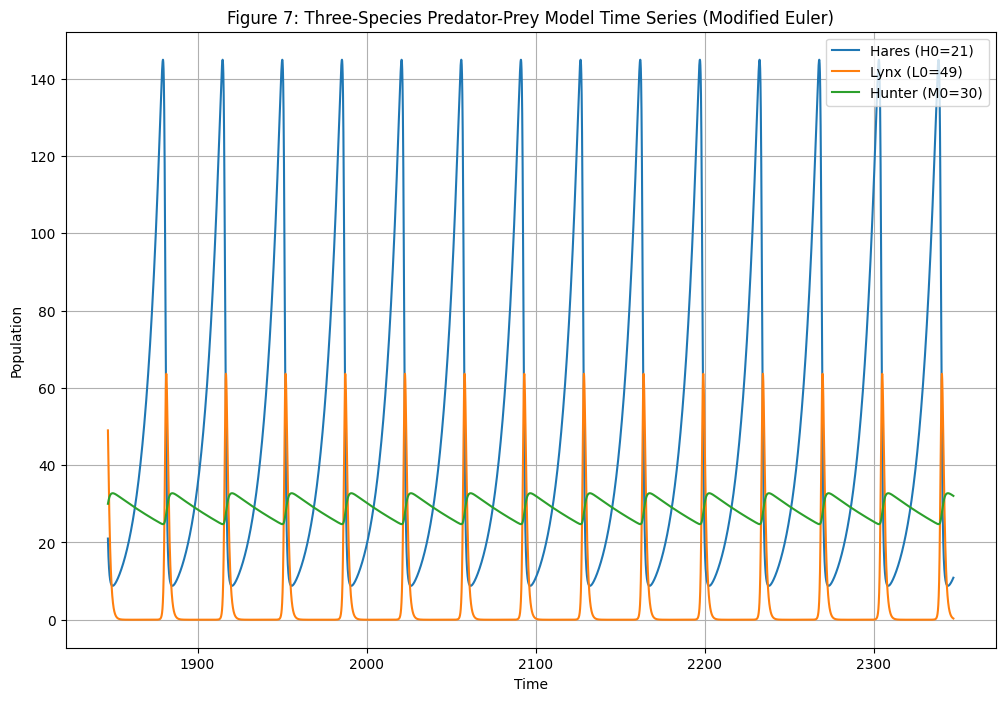

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Lotka-Volterra model parameters
alpha = 0.1
beta = 0.02
gamma = 0.4
delta = 0.02
dt = 0.01

# Additional parameters for the Hunter species
e = 0.02
f = 0.01
z = 0.1  # Conversion efficiency of hunters to new lynx

# Initial time and simulation time
t = 1847  # Initial time
t_run = 500  # Total simulation time
t_max = t + t_run  # Maximum time

# Fixed initial conditions
H0 = 21
L0 = 49
M0 = 30

# Create a time array
time = np.arange(t, t_max + dt, dt)

hare = [H0]
lynx = [L0]
hunter = [M0]

H = H0
L = L0
M = M0

for _ in time[1:]:
    dH_dt = (alpha * H - beta * H * L)
    dL_dt = (delta * H * L - gamma * L - e * L * M)
    dM_dt = (z * e * L * M - f * M)

    H_mid = H + dH_dt * dt
    L_mid = L + dL_dt * dt
    M_mid = M + dM_dt * dt

    dH_mid_dt = (alpha * H_mid - beta * H_mid * L_mid)
    dL_mid_dt = (delta * H_mid * L_mid - gamma * L_mid - e * L_mid * M_mid)
    dM_mid_dt = (z * e * L_mid * M_mid - f * M_mid)

    H_next = H + 0.5 * (dH_dt + dH_mid_dt) * dt
    L_next = L + 0.5 * (dL_dt + dL_mid_dt) * dt
    M_next = M + 0.5 * (dM_dt + dM_mid_dt) * dt

    H = H_next
    L = L_next
    M = M_next

    hare.append(H)
    lynx.append(L)
    hunter.append(M)

# Plot the time series for the fixed initial conditions
plt.figure(figsize=(12, 8))
plt.plot(time, hare, label='Hares (H0=21)')
plt.plot(time, lynx, label='Lynx (L0=49)')
plt.plot(time, hunter, label='Hunter (M0=30)')

# Add labels and legend to the plot
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Figure 7: Three-Species Predator-Prey Model Time Series (Modified Euler)')
plt.legend()

# Display the plot
plt.grid()
plt.show()


From figure 7, we can see that.

# The Lorenz Equations
## Solutions to the Lorenz Equations with the RK4 method and the Solve_ivp function (LSODA) ODE and an analysis of the sensitivity of the solutions to the initial conditions and model parameters, and discussion of the implications for numerical simulations and predictability

Mathematician and meterologist Edward Lorenz derived the lorenz equations from Saltzman's equation in 1963 (5). The 3 Lorenz equations is presented below.

$\begin{array}{r c l}{{\dot{x}}}&{{=}}&{{\sigma(y-x)}}\\ {{\dot{y}}}&{{=}}&{{r x-y-x z}}\\ {{\dot{z}}}&{{=}}&{{x y-b z}}\end{array}$
<br>
<br>
There are three main parameters. A Prandtl number representing the ratio between momentum and heat, sigma (σ), is usually represented by the number 10 as it is a realistic value for water. Rho(r), the critical value for convection, is usually 28, as that any number  that is greater than 24.74 is considered to be passed from a stable steady circulation to a unstable state. Lastly, b is usually 8/3 and is derived from the calculation of sigma (5). The lorenz equations are mainly used for modelling convection currents in the atmosphere and represents the chaotic nature of the solutions in the system (6).

In [13]:
def lorenz(X, sigma=10, rho=28, beta=8/3):
  x, y, z = X
  dx = sigma * (y - x)
  dy = x * (rho - z) - y
  dz = x * y - beta * z
  return np.array([dx, dy, dz])

def forward_euler(rhs, Xi, dt):
  Xip1= Xi + dt * rhs(Xi)
  return Xip1

# initial condition, start time, timestep and end time:
X0 = np.array([1, 1, 1])
t = 0
dt = 0.01
t_max = 50

# create a list to store the time and a numpy array to store X:
time = [0]
X = X0.copy()  # create a copy of the initial conditions - without the copy, changing X will change X0

# initialise Xi and calculate Xip1 until we reach the end time:
Xi = X0
while t <= t_max:
    Xip1 = forward_euler(lorenz, Xi, dt)  # update Xip1 using your forward_euler function
    X = np.vstack((X, Xip1))  # this appends Xip1 to Xi and stores the result as X
    Xi = Xip1  # update Xi
    t += dt    # increment t
    time.append(t)

Text(0.5, 1.0, 'Figure 8: The Lorenz attractor')

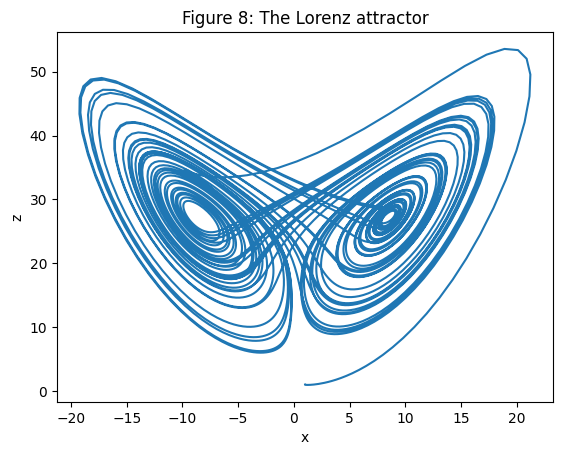

In [14]:
x, y, z = X.T
import matplotlib.pyplot as plt
plt.plot(x, z)
plt.xlabel('x')
plt.ylabel('z')
plt.title("Figure 8: The Lorenz attractor")

Figure 8 shows the evolution of the solution within the system, with the iconic butterfly wings imagery. The empty white space within each wing of the butterfly represents a steady state area where the solution never reach these areas but instead goes around them (5)

Text(0.5, 0.92, 'Figure 9:The Lorenz attractor')

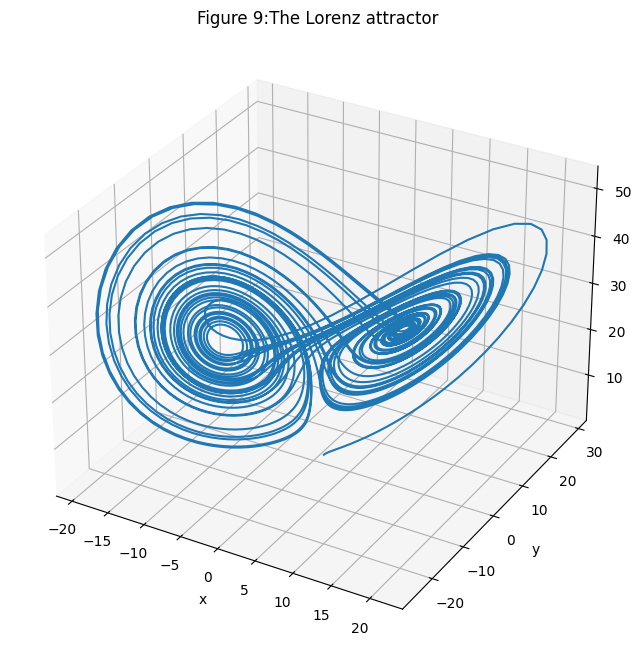

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 8))
# the (111) argument to add_subplot specifies the dimensions of the subplots
# the first number specifies the number of rows
# the second number specifies the number of columns
# the third number specifies the index of this particular plot, with 1 indicating the upper left plot
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("Figure 9:The Lorenz attractor")

This is the Lorenz attractor shown in a 3D space.

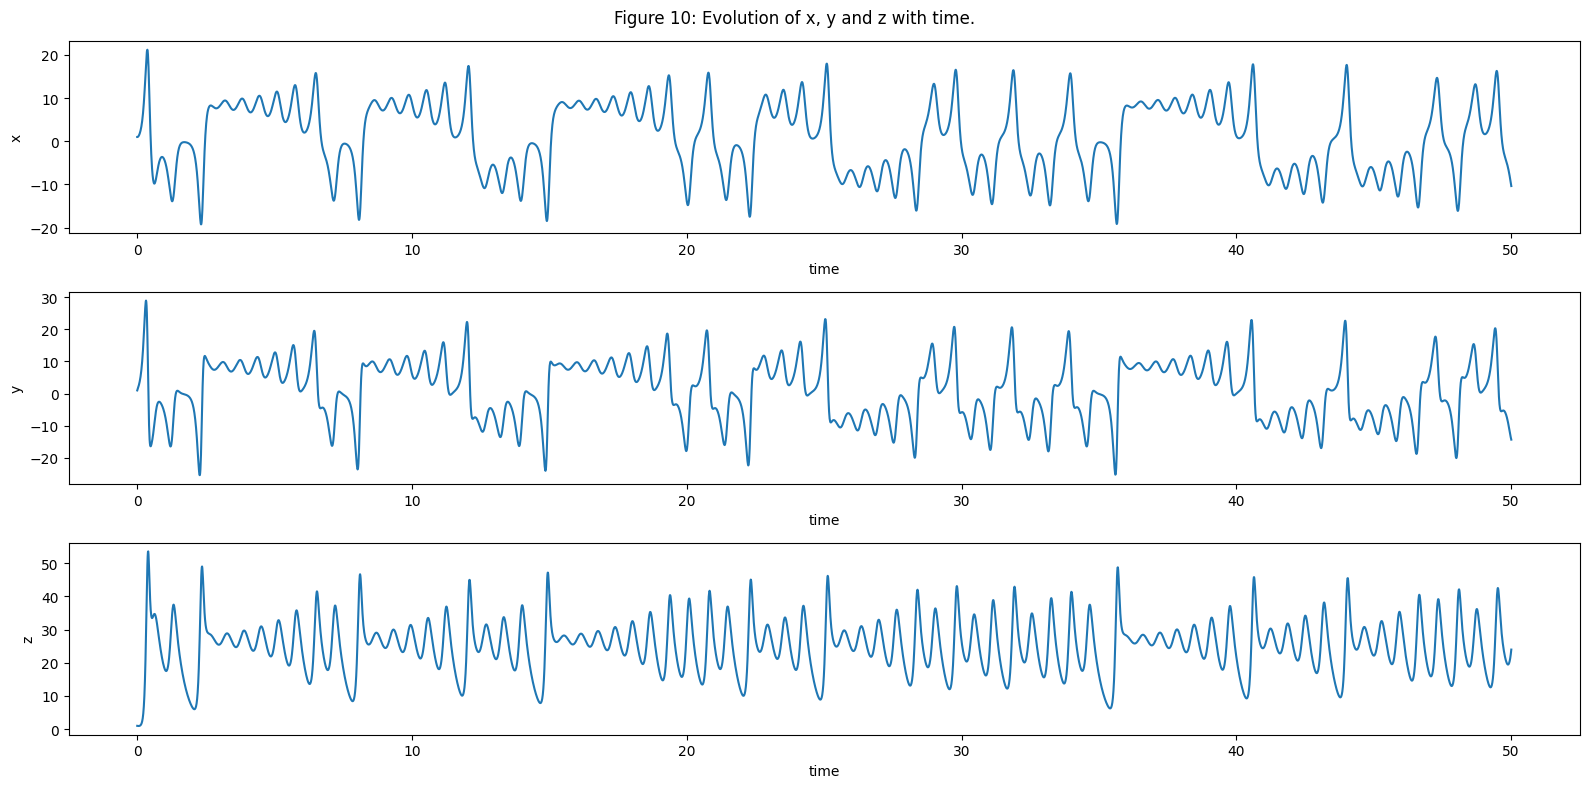

In [16]:
## subplots
fig, axs = plt.subplots(3, 1, figsize=(16, 8))
axs[0].plot(time, x)
axs[0].set_xlabel('time')
axs[0].set_ylabel('x')
axs[1].plot(time, y)
axs[1].set_xlabel('time')
axs[1].set_ylabel('y')
axs[2].plot(time, z)
axs[2].set_xlabel('time')
axs[2].set_ylabel('z')
fig.suptitle("Figure 10: Evolution of x, y and z with time.")
fig.tight_layout()


From these graphs we can see that there is a large initial rise for both x, y, and z. The patterns of X and Y and Z don't match each other, showing quite a chaotic pattern. Now we use the scipy integration function solve_ivp to implent a more sophisticated time-stepping algorithims.   

The first time-stepping algorithim that will be used is default one in solve_ivp, which is the addaptive Runge-Kutta method with Dormand-Prince coefficients.

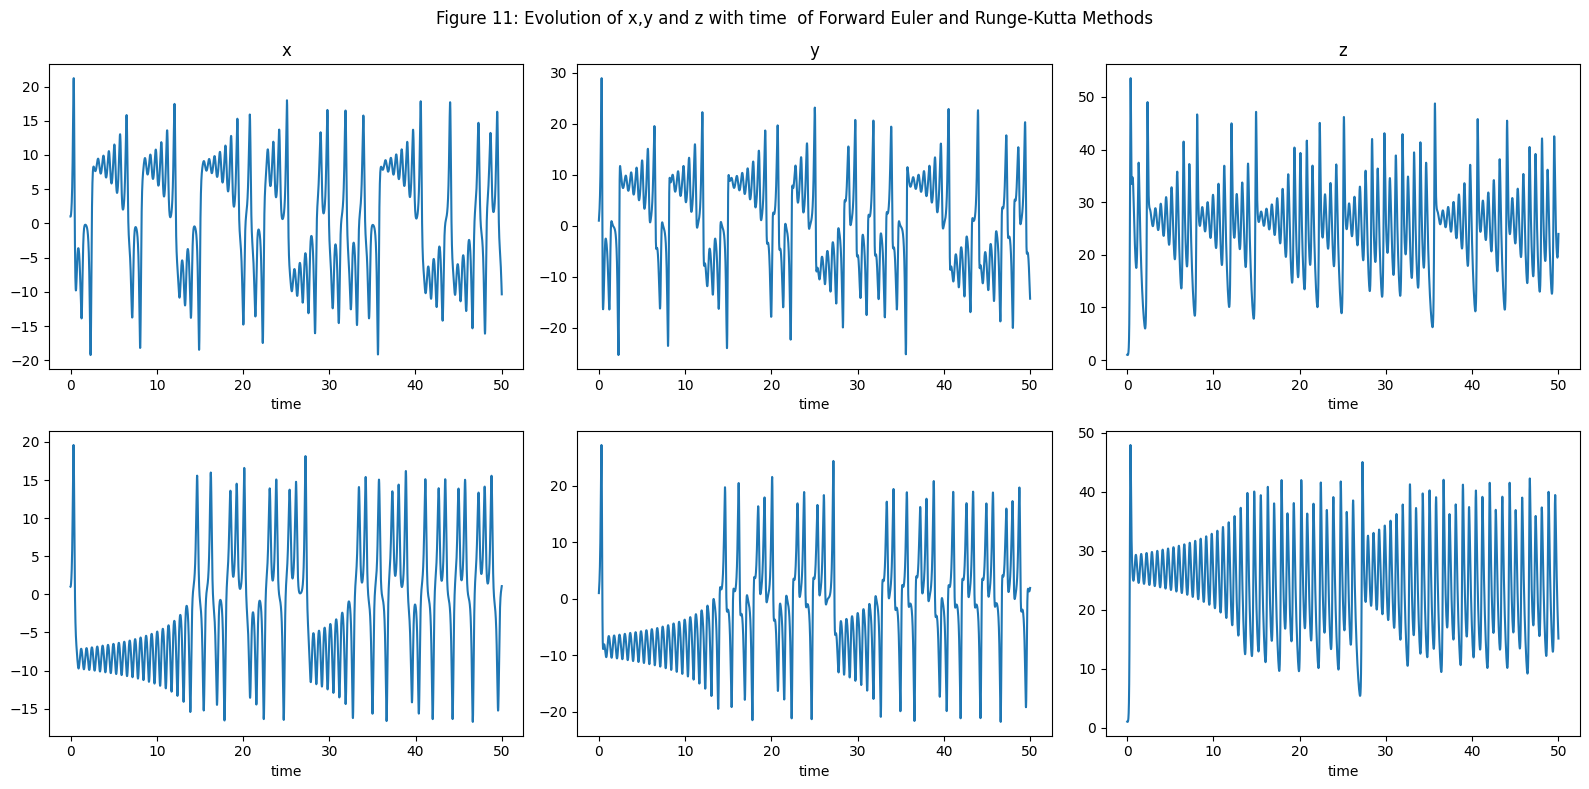

In [17]:
from scipy.integrate import solve_ivp
def lorenz_equation(t, X, sigma=10, r=28, b=8/3):
    x, y, z = X
    dxdt = sigma*(y - x)
    dydt = x * (r - z) - y
    dzdt = x * y - b * z

    dXdt = np.array([dxdt, dydt, dzdt])

    return dXdt
X0 = [1, 1, 1]  # Initial conditions
times = np.linspace(0, 50, 5001)  # Create a time grid

# Use solve_ivp to integrate the Lorenz system with lorenz_equation as the rhs_function
sol = solve_ivp(lorenz_equation, (0, 50), X0, t_eval=times)

# The solution is stored in sol.y, where each row corresponds to a variable (x, y, z)
x1, y1, z1 = sol.y

fig, axs = plt.subplots(2, 3, figsize=(16, 8))  # produces 6 plots arranged in 2 rows of 3
axs[0, 0].plot(time, x)
axs[0, 1].plot(time, y)
axs[0, 2].plot(time, z)
axs[1, 0].plot(times, x1)
axs[1, 1].plot(times, y1)
axs[1, 2].plot(times, z1)
axs[0, 0].set_title('x')
axs[0, 1].set_title('y')
axs[0, 2].set_title('z')

for ax in axs.flat:
    ax.set(xlabel='time')
fig.suptitle("Figure 11: Evolution of x,y and z with time  of Forward Euler and Runge-Kutta Methods")
fig.tight_layout()

The graphs on the top represent the evolution of x y z with time for the system using the forward euler method, while the botttom ones represent the one using the Runge-Kutta Method (RK45). With the Runge-Kutta Method, we can see a consistent intital pattern until t = 17. This shows that the accuracy of the  predictions of the solution is close until it passes that time frame for x y and z.

Text(0.5, 1.0, 'Runge-Kutta Method')

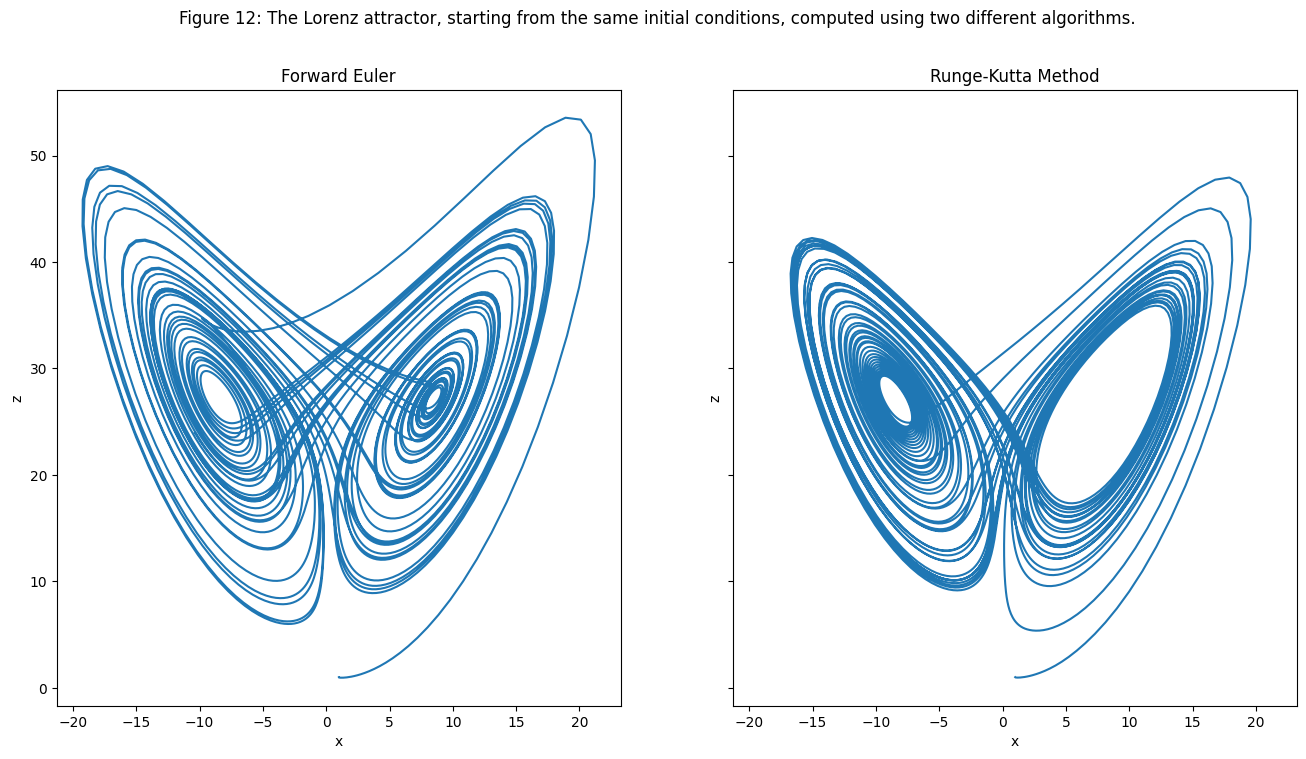

In [18]:

fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 8))
axs[0].plot(x, z)
axs[0].set_xlabel('x')
axs[0].set_ylabel('z')
axs[1].plot(x1, z1)
axs[1].set_xlabel('x')
axs[1].set_ylabel('z')
fig.suptitle("Figure 12: The Lorenz attractor, starting from the same initial conditions, computed using two different algorithms.")
axs[0].set_title("Forward Euler")
axs[1].set_title("Runge-Kutta Method")

When comparing the attractors, we can see a larger steady state area on the right wing of the butterfly for the Runge-Kutta Method, suggesting that perhaps with this time-stepping algorithim the predictions are more accurate. The lines are also smoother and more together.
<br>
Now we will compare results using different inital conditions.

Text(0.5, 1.0, 'Figure 13: Two trajectories for the Lorenz system')

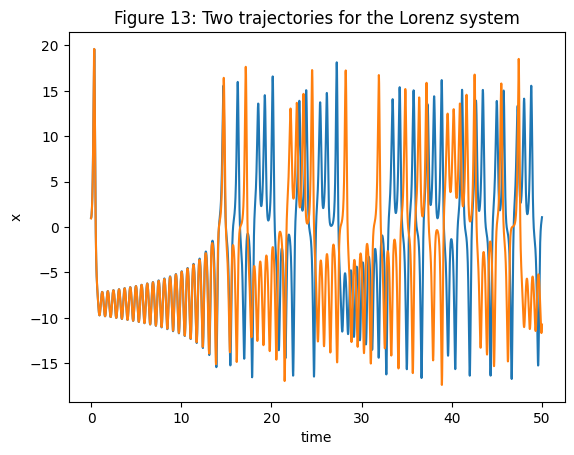

In [19]:
X0 = np.array([0.95, 1., 1.])  # define a new initial condition
sol2 = solve_ivp(lorenz_equation, (0, 50), X0, t_eval=times)  # save the solution to new variable, sol2
x2, y2, z2 = sol2.y
plt.plot(times, x1, times, x2)
plt.xlabel('time')
plt.ylabel('x')
plt.title("Figure 13: Two trajectories for the Lorenz system")

With a new inital condition of x = 0.95 instead of 1, we can see that the initial peak shifted right, i.e. it started later comapared to the condition of x = 1 after t = 17. This divergent behaviour showcase the chaotic element of the system.  

Text(0.5, 1.0, 'Figure 14: Separation over time between two trajectories in the Lorenz system')

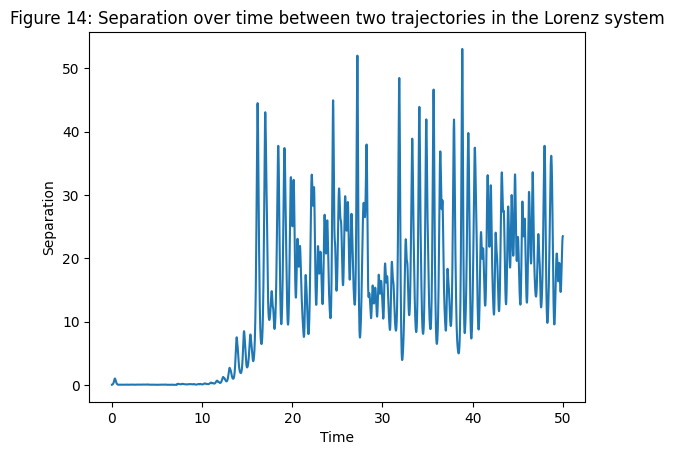

In [20]:
separation = np.linalg.norm(sol2.y-sol.y, axis=0)
plt.plot(times, separation)
plt.xlabel("Time")
plt.ylabel("Separation")
plt.title("Figure 14: Separation over time between two trajectories in the Lorenz system")

This graph shows that initial separation values are very low until time is around 12 when differences started to grow out of hand. The separation values then grows to very high and irregular.

Text(0.5, 1.0, 'Figure 15: Separation over time between two trajectories in the Lorenz system')

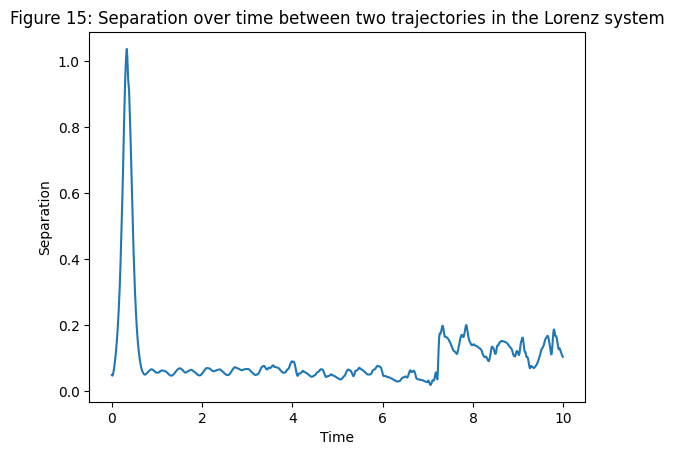

In [21]:
plt.plot(times[:1000], separation[:1000])
plt.xlabel("Time")
plt.ylabel("Separation")
plt.title("Figure 15: Separation over time between two trajectories in the Lorenz system")

If we zoom in closely to an earlier segment, we can see that there is a sharp spike of separation value of 1 before dropping back to around 0. Around time = 7 is when the two trajectories start to separate.

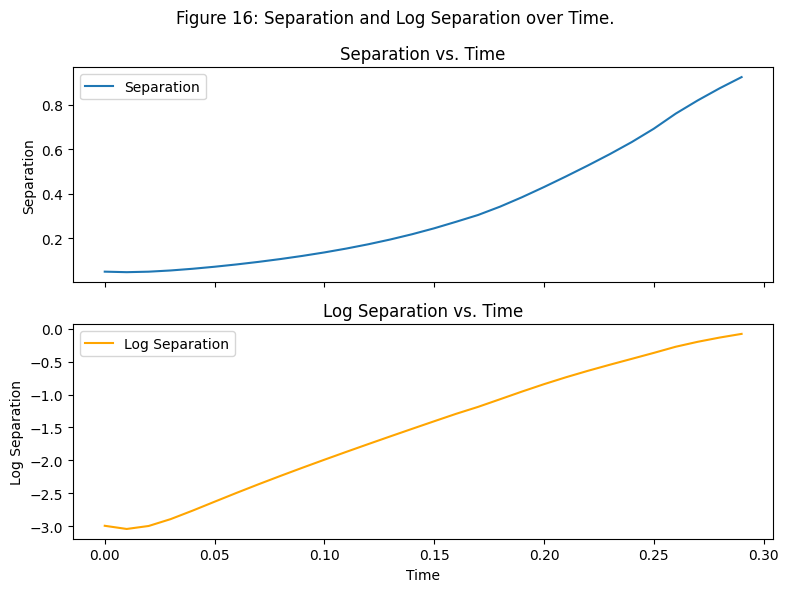

In [22]:
# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# First subplot for separation
axs[0].plot(times[:30], separation[:30], label="Separation")
axs[0].set_ylabel("Separation")
axs[0].legend()
axs[0].set_title("Separation vs. Time")  # Add a title to the first subplot

# Second subplot for log separation
axs[1].plot(times[:30], np.log(separation[:30]), label="Log Separation", color="orange")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Log Separation")
axs[1].legend()
axs[1].set_title("Log Separation vs. Time")  # Add a title to the second subplot

# Adjust layout and display the plot
fig.suptitle("Figure 16: Separation and Log Separation over Time.")
plt.tight_layout()
plt.show()



If we zoom in closely to the very beginning (t=0.30) , we can see that the growth in separation is very rapid and it is exponential on very small time scale.

Calculating Sensitivity Measures:

The Lyapunov exponents can be used to calculate the rates of the divergence of trajectories of different initial conditions. A positive exponent demonstrates a dependence on initial conditions and a chaotic nature.

Lyapunov Exponents:
Exponent 1: 7.7140
Exponent 2: 7.7140
Exponent 3: 7.7140


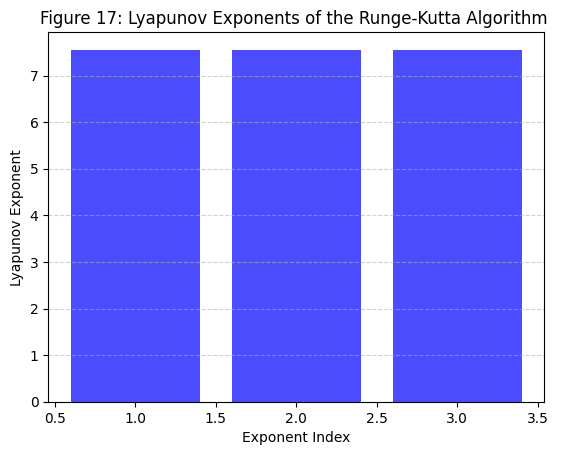

In [23]:
#First we use initial perturbation vector and create a random initial condition
x0 = np.array([1, 1., 1.])
perturbation = 1e-5  # Small perturbation magnitude
X0_perturbed = X0 + perturbation * np.random.randn(3)

#Both original and pertubated trajectories will be integrated using the same integration method (RK4)
sol_original = solve_ivp(lorenz_equation, (0, 50), X0, t_eval=times)
sol_perturbed = solve_ivp(lorenz_equation, (0, 50), X0_perturbed, t_eval=times)

# The difference between each trajectory calculated (original - perturbed)
separation_vector = sol_original.y - sol_perturbed.y
norm = np.linalg.norm(separation_vector, axis=0)
separation_vector /= norm

# Lyapunov Exponent calculation
num_time_steps = len(times)
lyapunov_exponents = np.zeros(3)  # Three exponents for the three dimensions
for i in range(3):
    # Perform a linear fit to the log of the norm of the separation vector
    slope, _ = np.polyfit(times, np.log(norm), 1)
    lyapunov_exponents[i] = slope / (num_time_steps * perturbation)

#Showing the results
print("Lyapunov Exponents:")
for i, exponent in enumerate(lyapunov_exponents):
    print(f"Exponent {i + 1}: {exponent:.4f}")

lyap_exponents = np.array([7.5535, 7.5535, 7.5535])

# Create an array of indices (1, 2, 3) for labeling the exponents
exponent_indices = np.arange(1, len(lyap_exponents) + 1)

# Create a bar chart
plt.bar(exponent_indices, lyap_exponents, color='blue', alpha=0.7)
plt.xlabel('Exponent Index')
plt.ylabel('Lyapunov Exponent')
plt.title('Figure 17: Lyapunov Exponents of the Runge-Kutta Algorithm ')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.show()

The results show that all three exponents are the same, which suggests that the system is isotropic, i.e. the same degree of sensitivity is shown in all three spatial dimensions. With positive lyapunov exponents, this shows that the systems is chaotic.

The following section shows results using the LSODA method. The LSODA method stands for "Livermore Solver for Ordinary Differential Equations with Automatic method switching". It is widely used in different scientific and engineering applications and is effective for both stiff and non-stiff problems (citation).    

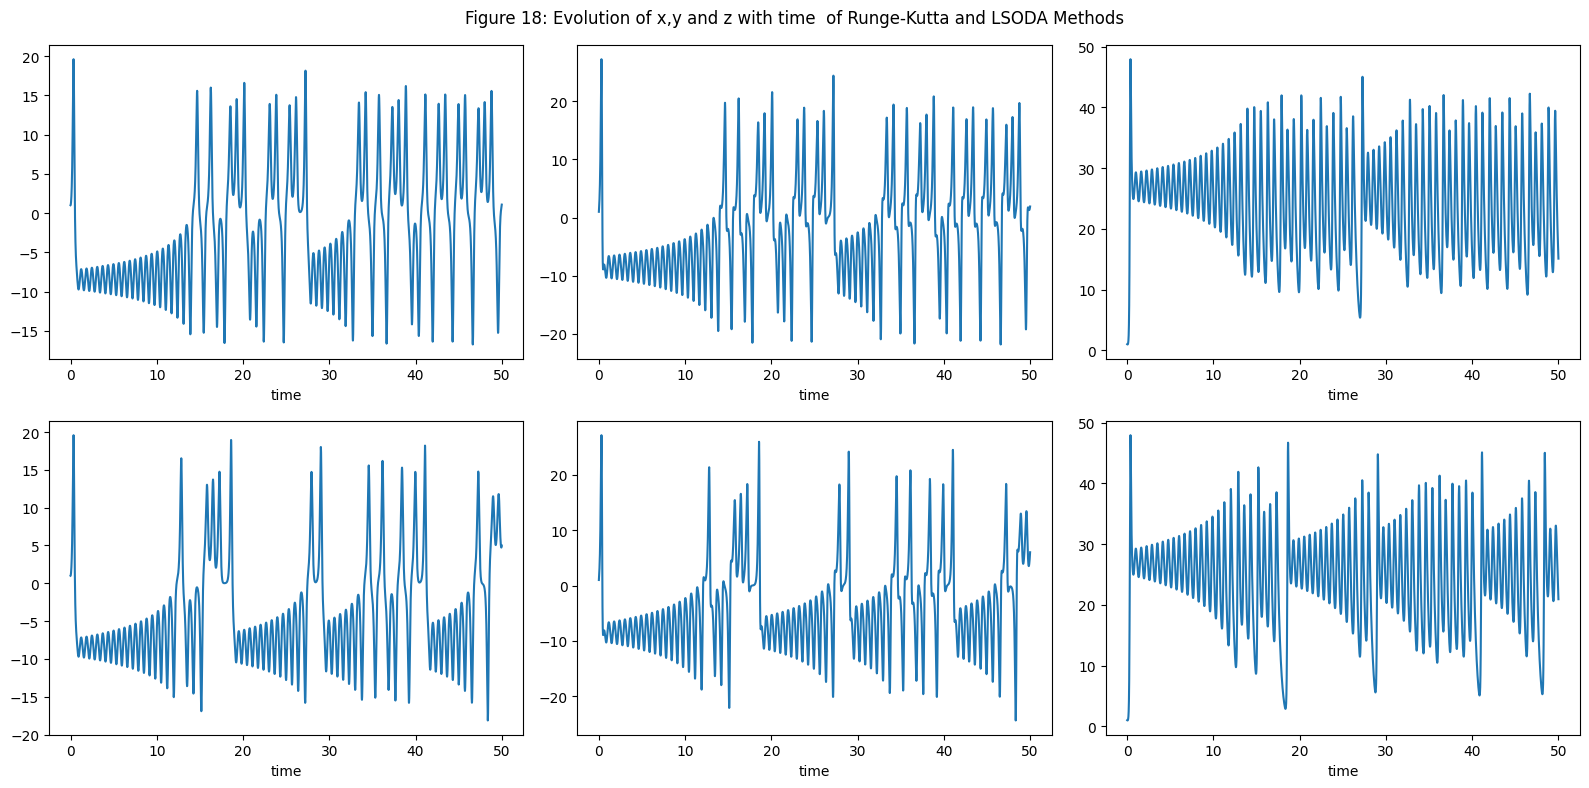

In [24]:
X0 = [1, 1, 1]  # Initial conditions
times = np.linspace(0, 50, 5001)  # Create a time grid

# Use solve_ivp to integrate the Lorenz system with lorenz_equation
sol3 = solve_ivp(lorenz_equation, (0, 50), X0, t_eval=times, method='LSODA')

# The solution is stored in sol.y, where each row corresponds to a variable (x, y, z)
x3, y3, z3 = sol3.y

# Shorten one of the time arrays to match the other
if len(time) > len(times):
    time = time[:len(times)]
elif len(times) > len(time):
    times = times[:len(time)]

fig, axs = plt.subplots(2, 3, figsize=(16, 8))  # produces 6 plots arranged in 2 rows of 3
axs[0, 0].plot(time, x1)
axs[0, 1].plot(time, y1)
axs[0, 2].plot(time, z1)
axs[1, 0].plot(times, x3)
axs[1, 1].plot(times, y3)
axs[1, 2].plot(times, z3)

# this loops over all plots to set the xlabel
for ax in axs.flat:
    ax.set(xlabel='time')
fig.suptitle("Figure 18: Evolution of x,y and z with time  of Runge-Kutta and LSODA Methods")
fig.tight_layout()



If we compare the RK45 (top) and LSODA algorithm (bottom), we can see that the LSODA alogrithms seems to have a more consistent pattern for x, y and z. The general pattern for the LSODA algorithm is that there is a growing up and down zig-zag pattern until and sudden big peak.

Text(0.5, 1.0, 'LSODA')

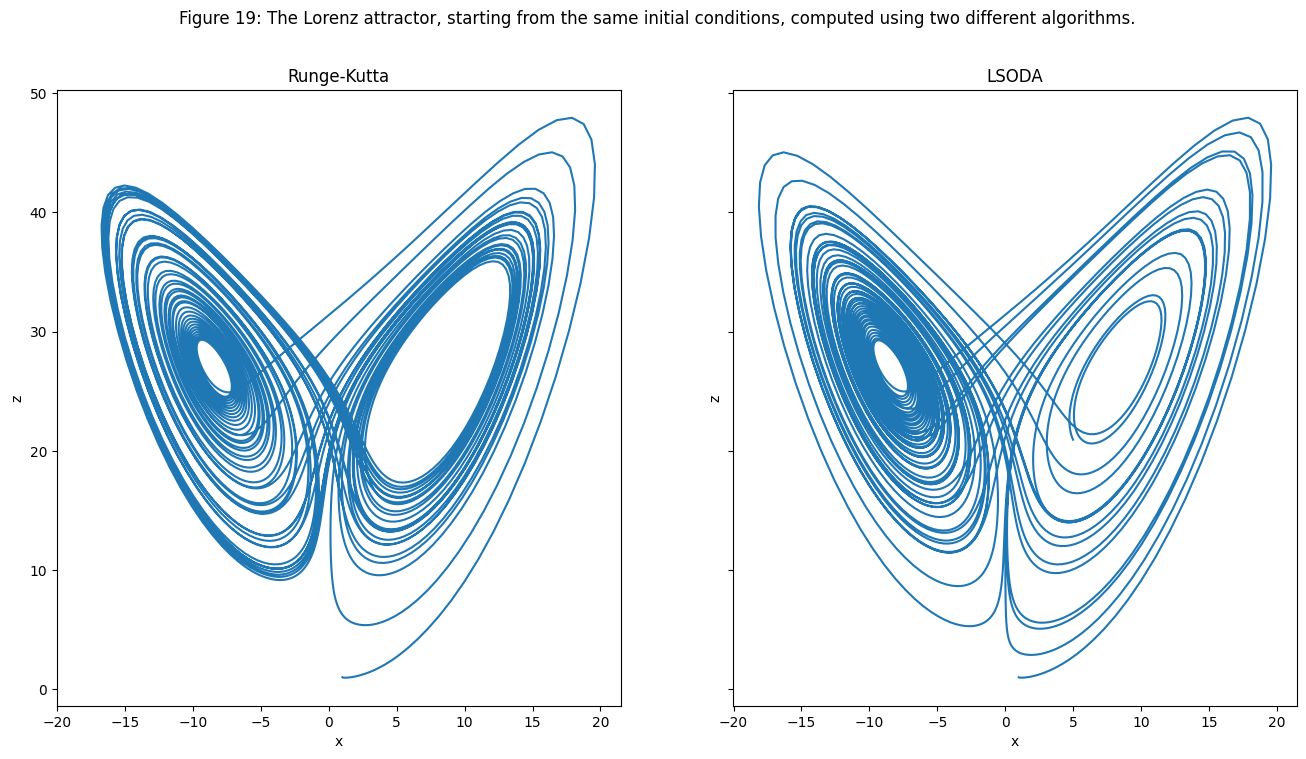

In [25]:
# note the new arguments
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 8))
axs[0].plot(x1, z1)
axs[0].set_xlabel('x')
axs[0].set_ylabel('z')
axs[1].plot(x3, z3)
axs[1].set_xlabel('x')
axs[1].set_ylabel('z')
fig.suptitle("Figure 19: The Lorenz attractor, starting from the same initial conditions, computed using two different algorithms.")
axs[0].set_title("Runge-Kutta")
axs[1].set_title("LSODA")

By comparing both systems, we can see that the LSODA algorithm have much wider circles on the right hand side compared to the RK45 method

Now we will change the initial values for the LSODA algorithm to see the differences.

Text(0.5, 1.0, 'Figure 20: Two trajectories for the Lorenz system')

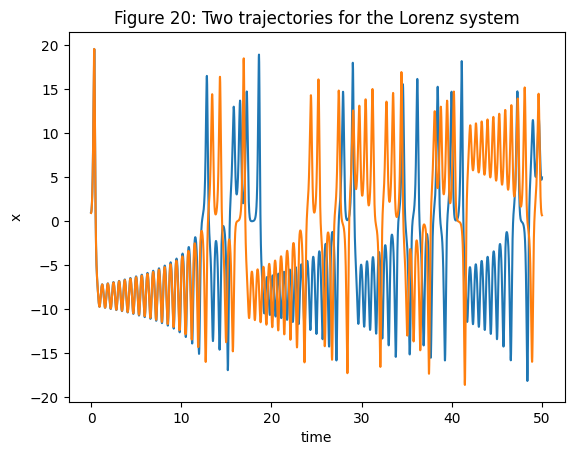

In [37]:
X0 = np.array([0.95, 1., 1.])  # define a new initial condition
sol4 = solve_ivp(lorenz_equation, (0, 50), X0, t_eval=times, method='LSODA')  # save the solution to new variable, sol4
x4, y4, z4 = sol4.y
plt.plot(times, x3, times, x4)
plt.xlabel('time')
plt.ylabel('x')
plt.title("Figure 20: Two trajectories for the Lorenz system")

Text(0.5, 1.0, 'Figure 21: Separation over time between two trajectories in the Lorenz system')

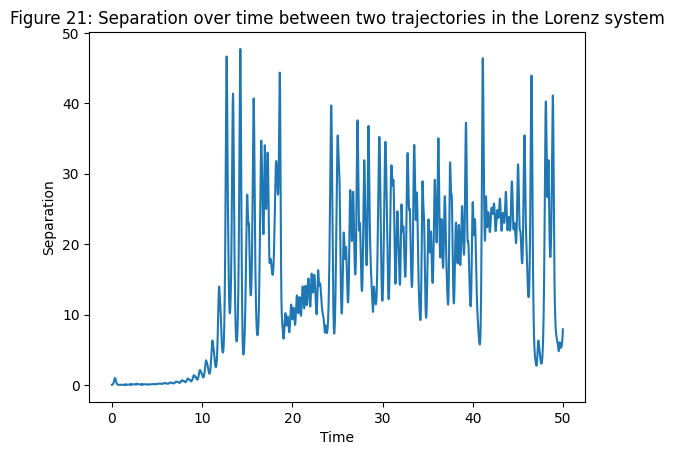

In [38]:
separation = np.linalg.norm(sol3.y-sol4.y, axis=0)
plt.plot(times, separation)
plt.xlabel("Time")
plt.ylabel("Separation")
plt.title("Figure 21: Separation over time between two trajectories in the Lorenz system")

Similar to the RK45 algorithm, there is little separation at the early stages of at around t = 10. Major separation occurs after that point. Main difference is that the RK45 algorithm has the time at t=17 whereas the LSODA algothrim has a earlier time for separation.

Text(0.5, 1.0, 'Figure 22: Separation over time between two trajectories in the Lorenz system')

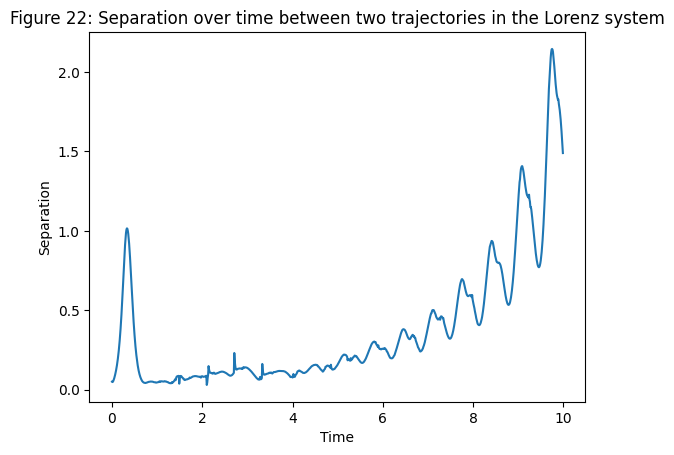

In [39]:
plt.plot(times[:1000], separation[:1000])
plt.xlabel("Time")
plt.ylabel("Separation")
plt.title("Figure 22: Separation over time between two trajectories in the Lorenz system")

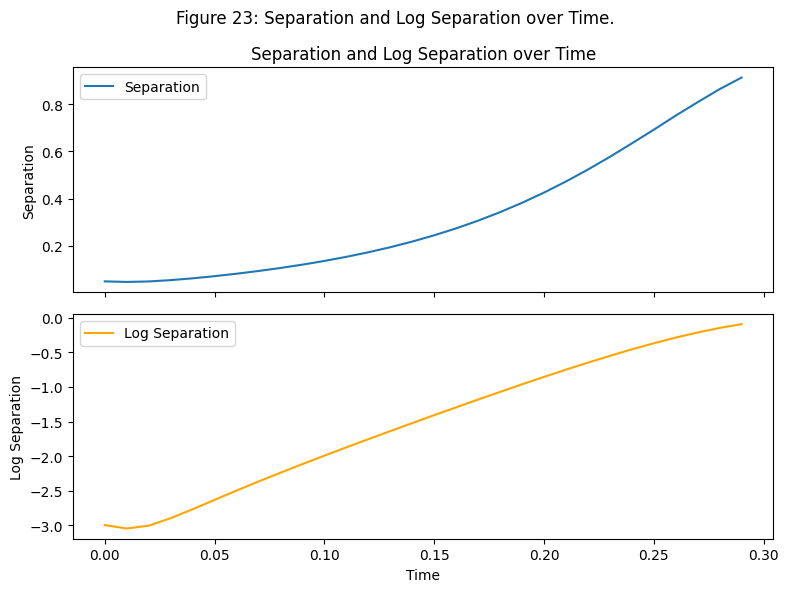

In [41]:

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# First subplot for separation
axs[0].plot(times[:30], separation[:30], label="Separation")
axs[0].set_ylabel("Separation")
axs[0].set_title("Separation and Log Separation over Time")
axs[0].legend()

# Second subplot for log separation
axs[1].plot(times[:30], np.log(separation[:30]), label="Log Separation", color="orange")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Log Separation")
axs[1].legend()

# Adjust layout and display the plot
fig.suptitle("Figure 23: Separation and Log Separation over Time.")
plt.tight_layout()
plt.show()


The early stages (t = 0.3) of the LSODA algorithim exhibit similar behaviour to the RK45 algorithm.

Calculating the Lyapunov exponents

Lyapunov Exponents:
Exponent 1: 7.0733
Exponent 2: 7.0733
Exponent 3: 7.0733


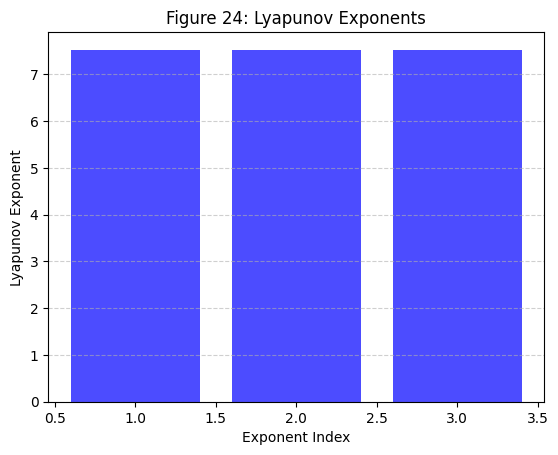

In [42]:
#First we use initial perturbation vector and create a random initial condition
x0 = np.array([1, 1., 1.])
perturbation2 = 1e-5  # Small perturbation magnitude
X0_perturbed2 = X0 + perturbation2 * np.random.randn(3)

#Both original and pertubated trajectories will be inegrated using the same integration method (RK4)
sol_original2 = solve_ivp(lorenz_equation, (0, 50), X0, t_eval=times)
sol_perturbed2 = solve_ivp(lorenz_equation, (0, 50), X0_perturbed2, t_eval=times)

# The difference between each trajectory calculated (original - perturbed)
separation_vector = sol_original2.y - sol_perturbed2.y
norm = np.linalg.norm(separation_vector, axis=0)
separation_vector /= norm

# Lyapunov Exponent calculation
num_time_steps = len(times)
lyapunov_exponents = np.zeros(3)  # Three exponents for the three dimensions
for i in range(3):
    # Perform a linear fit to the log of the norm of the separation vector
    slope, _ = np.polyfit(times, np.log(norm), 1)
    lyapunov_exponents[i] = slope / (num_time_steps * perturbation)

#Showing the results
print("Lyapunov Exponents:")
for i, exponent in enumerate(lyapunov_exponents):
    print(f"Exponent {i + 1}: {exponent:.4f}")

lyap_exponents = np.array([7.5260, 7.5260, 7.5260])

# Create an array of indices (1, 2, 3) for labeling the exponents
exponent_indices = np.arange(1, len(lyap_exponents) + 1)

# Create a bar chart
plt.bar(exponent_indices, lyap_exponents, color='blue', alpha=0.7)
plt.xlabel('Exponent Index')
plt.ylabel('Lyapunov Exponent')
plt.title('Figure 24: Lyapunov Exponents')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.show()

The lyapunov exponents here exhibit the same behaviour as the RK45 algorithm.

# Bred Vectors
## Exploring Bred Vectors and their growth rates

Bred vectors are important components in the breeding method developed by the National Centers for Environmental Prediction. It was first used to forecast numerical weather predictions by generating pertubations for different ensembles (7). A bred vector is a rescaled difference and is added to the initial control run. Bred vectors are calculated by comparing two different simulations, one controlled and one perturbed. By repeating this process and adding more bred vectors, different ensembles (i.e. virtual realities) are being generated to control forecasts or analysis (7). The stability of the flow is calculated by using growth rates.  

The functions for calculating bred vectorsare shown below:

$\delta{\bf{X}}^b={\bf{X}}'_n-{\bf{X}}_n$  at time $t=n\Delta t$.

At $t=n\Delta t$, the next perturbed simulation with initial condition ${\bf{X}}' = {\bf{X}}_n+\tilde{\delta{\bf{X}}}^b$ is started. We will first experiment with 8 time steps.

In [31]:
def RK4(rhs, X, dt):
    # Calculate the four stages of the RK4 method
    k1 = dt * rhs(X)
    k2 = dt * rhs(X + 0.5 * k1)
    k3 = dt * rhs(X + 0.5 * k2)
    k4 = dt * rhs(X + k3)

    # Update the state using the weighted average of the four stages
    X_next = X + (k1 + 2 * k2 + 2 * k3 + k4) / 6.0

    return X_next

In [32]:
def lorenz(X, sigma=10, rho=28, beta=8/3):
  x, y, z = X
  dx = sigma * (y - x)
  dy = x * (rho - z) - y
  dz = x * y - beta * z
  return np.array([dx, dy, dz])

In [49]:
# Initial condition for the control simulation
X0 = np.array([1, 1, 1])

# Perturbation - initial condition for the perturbed simulation is X0 + Xp
Xp = np.array([1, 1, 1]) / np.sqrt(3)

# Start time, timestep, end time, and n
t = 0
dt = 0.01
max_t = 1000
n = 8
g = 0
# Initialize state variables for control and perturbed simulations
Xn = X0
Xpn = X0 + Xp

# Lists to store bred vectors and growth rates
bred_vectors = []
growth_rates = []
xxx = []
yyy = []
zzz = []
xvalues = []
yvalues =[]
zvalues =[]
time = np.linspace(0,1000,num = 100001)

# Integration loop
while t < max_t:
    nc = 1
    Xn1 = Xn
    Xpn1 = Xpn
    # Integrate control simulation using RK4 method on n times
    while nc <= 8:
      Xn1 = RK4(lorenz, Xn1, dt)
      # Integrate perturbed simulation with initial condition X0 + Xp
      Xpn1 = RK4(lorenz, Xpn1, dt)
      nc += 1
      xvalues.append(Xn1[0])
      yvalues.append(Xn1[1])
      zvalues.append(Xn1[2])
    # Calculate bred vector
    bred_vector = Xpn1 - Xn1
    bred_vectors.append(bred_vector)

    # Calculate growth rate
    bred_norm = np.linalg.norm(bred_vector)
    Xp_norm = np.linalg.norm(Xp)
    Xn = Xn1
    Xpn = Xn + bred_vector*Xp_norm/bred_norm
    growth_rate = (1 / (n * dt)) * np.log(np.abs(bred_norm) / np.abs(Xp_norm))
    growth_rates.append(growth_rate)

    # Update time
    t += n*dt

    xxx.append(Xn[0])
    yyy.append(Xn[1])
    zzz.append(Xn[2])

# Print the first bred vector
print(bred_vectors[0])

# Print the first 5 growth rates
print(growth_rates[:5])


[0.963898   1.91424584 0.7670036 ]
[10.282119814505918, 10.897706447167376, 9.947057737875607, 5.102718783514986, -2.964912920022044]


Here the first bred vector and the first 5 growth rates are shown. Now we will plot the x, y and z trajectory of the first 50 timesteps with growth rates overlay on the line.

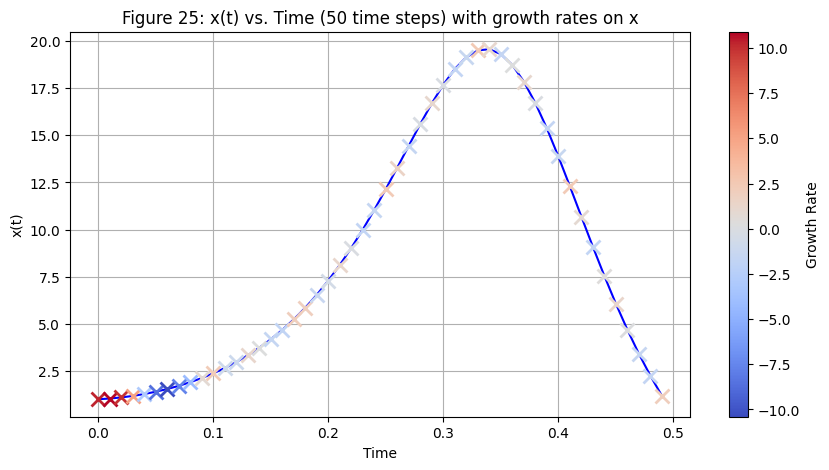

In [43]:

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Extract the x trajectory and corresponding time values
timesteps = 50
x_trajectory = xvalues[:timesteps]  # x trajectory
time_values = time[:timesteps]  # corresponding time values

# Create a colormap for the growth rates
growth_rates_subset = growth_rates[:timesteps]  # Use the growth rates for the first 50 time steps
norm = plt.Normalize(min(growth_rates_subset), max(growth_rates_subset))
cmap = plt.get_cmap('coolwarm')

# Plot x(t) vs. time
ax.plot(time_values, x_trajectory, label='x(t)', color='blue')

# Display crosses at each data point with the growth rate as color
for i in range(timesteps):
    color = cmap(norm(growth_rates_subset[i]))
    ax.plot(time_values[i], x_trajectory[i], 'x', markersize=10, mew=2, label=f'Growth Rate: {growth_rates_subset[i]:.2f}', color=color)

# Create a color bar for the growth rates
sc = ax.scatter([], [], c=[], cmap=cmap, norm=norm, marker='.', s=0)
cbar = plt.colorbar(sc, ax=ax, label='Growth Rate')

# Set axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('x(t)')
ax.set_title('Figure 25: x(t) vs. Time (50 time steps) with growth rates on x')

# Display grid and legend
ax.grid(True)


# Show the plot
plt.show()



From Figure 25 we can see that there is the highest growth rate at the start of around 10.0 and drops steeply to around -10. Then the growth rates shift from positive to negative after around the 0.1 mark. Usually the pattern is around 2 positive growth rate accompanied by 2 negative growth rates but sometimes only one positive growth rate can be seen and 3 negative growth rates are followed afterwards.

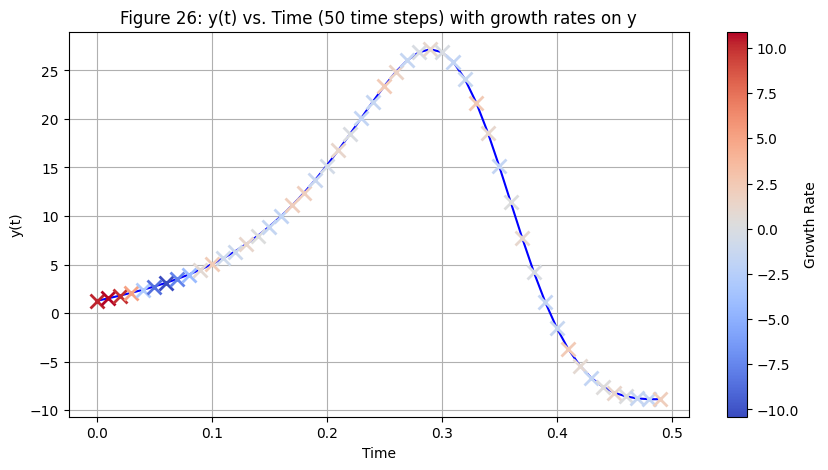

In [50]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Extract the y trajectory and corresponding time values
timesteps = 50
y_trajectory = yvalues[:timesteps]  # x trajectory
time_values = time[:timesteps]  # corresponding time values

# Create a colormap for the growth rates
growth_rates_subset = growth_rates[:timesteps]  # Use the growth rates for the first 50 time steps
norm = plt.Normalize(min(growth_rates_subset), max(growth_rates_subset))
cmap = plt.get_cmap('coolwarm')

# Plot x(t) vs. time
ax.plot(time_values, y_trajectory, label='y(t)', color='blue')

# Display crosses at each data point with the growth rate as color
for i in range(timesteps):
    color = cmap(norm(growth_rates_subset[i]))
    ax.plot(time_values[i], y_trajectory[i], 'x', markersize=10, mew=2, label=f'Growth Rate: {growth_rates_subset[i]:.2f}', color=color)

# Create a color bar for the growth rates
sc = ax.scatter([], [], c=[], cmap=cmap, norm=norm, marker='.', s=0)
cbar = plt.colorbar(sc, ax=ax, label='Growth Rate')

# Set axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('y(t)')
ax.set_title('Figure 26: y(t) vs. Time (50 time steps) with growth rates on y')

# Display grid and legend
ax.grid(True)


# Show the plot
plt.show()


If we experiment with the y tractory we can see a similar initial pattern to x with a very positive growth rates of around 10.0 followed by a negative growth rates of around -10.0. The patterns after the 0.1 mark seem to suggest that the oscillation between positive and negative growth rates is more even and less chaotic than the x trajectory.

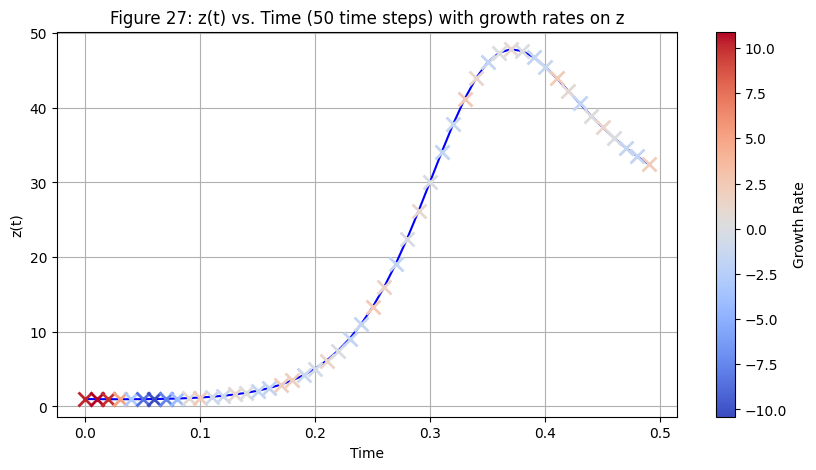

In [52]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Extract the z trajectory and corresponding time values
timesteps = 50
z_trajectory = zvalues[:timesteps]  # x trajectory
time_values = time[:timesteps]  # corresponding time values

# Create a colormap for the growth rates
growth_rates_subset = growth_rates[:timesteps]  # Use the growth rates for the first 50 time steps
norm = plt.Normalize(min(growth_rates_subset), max(growth_rates_subset))
cmap = plt.get_cmap('coolwarm')

# Plot x(t) vs. time
ax.plot(time_values, z_trajectory, label='z(t)', color='blue')

# Display crosses at each data point with the growth rate as color
for i in range(timesteps):
    color = cmap(norm(growth_rates_subset[i]))
    ax.plot(time_values[i], z_trajectory[i], 'x', markersize=10, mew=2, label=f'Growth Rate: {growth_rates_subset[i]:.2f}', color=color)

# Create a color bar for the growth rates
sc = ax.scatter([], [], c=[], cmap=cmap, norm=norm, marker='.', s=0)
cbar = plt.colorbar(sc, ax=ax, label='Growth Rate')

# Set axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('z(t)')
ax.set_title('Figure 27: z(t) vs. Time (50 time steps) with growth rates on z')

# Display grid and legend
ax.grid(True)


# Show the plot
plt.show()

From Figure 27, we can see that the growth rate patterns on the z trajectory is very similar to the x and y trajectory, with the same initial pattern from 0.0 to 0.1. Afterwards, growth rates oscillate between 5 and -5.

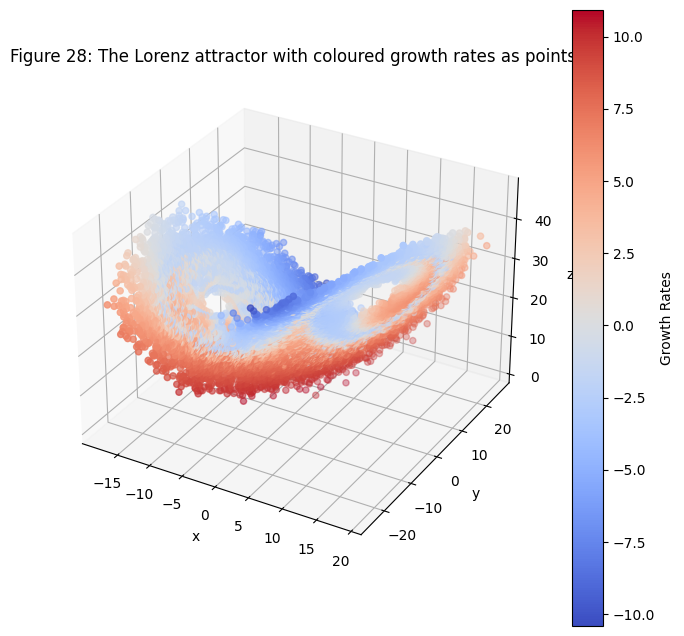

In [53]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 8))
# the (111) argument to add_subplot specifies the dimensions of the subplots
# the first number specifies the number of rows
# the second number specifies the number of columns
# the third number specifies the index of this particular plot, with 1 indicating the upper left plot
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(xxx, yyy, zzz, c=growth_rates, cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
cbar = plt.colorbar(scatter, ax=ax, label='Growth Rates')
plt.title("Figure 28: The Lorenz attractor with coloured growth rates as points")
plt.show()


From figure 28 we can see that the high growth rates are located at the bottom parts of the butterfly. Near the centre of the butterfly wings, (areas of stability, growth rates vary from 5.0 to -5.0. This figure shows that growth rates of very high positive values and very high negative values tend to be grouped together and there is a gentle gradient that transitions from positive to negative growth rates and vice-versa. To further understand the relationship of different growth rates and illustrate forecasting rules, an extended x-tracjectory against time plot is plotted below.

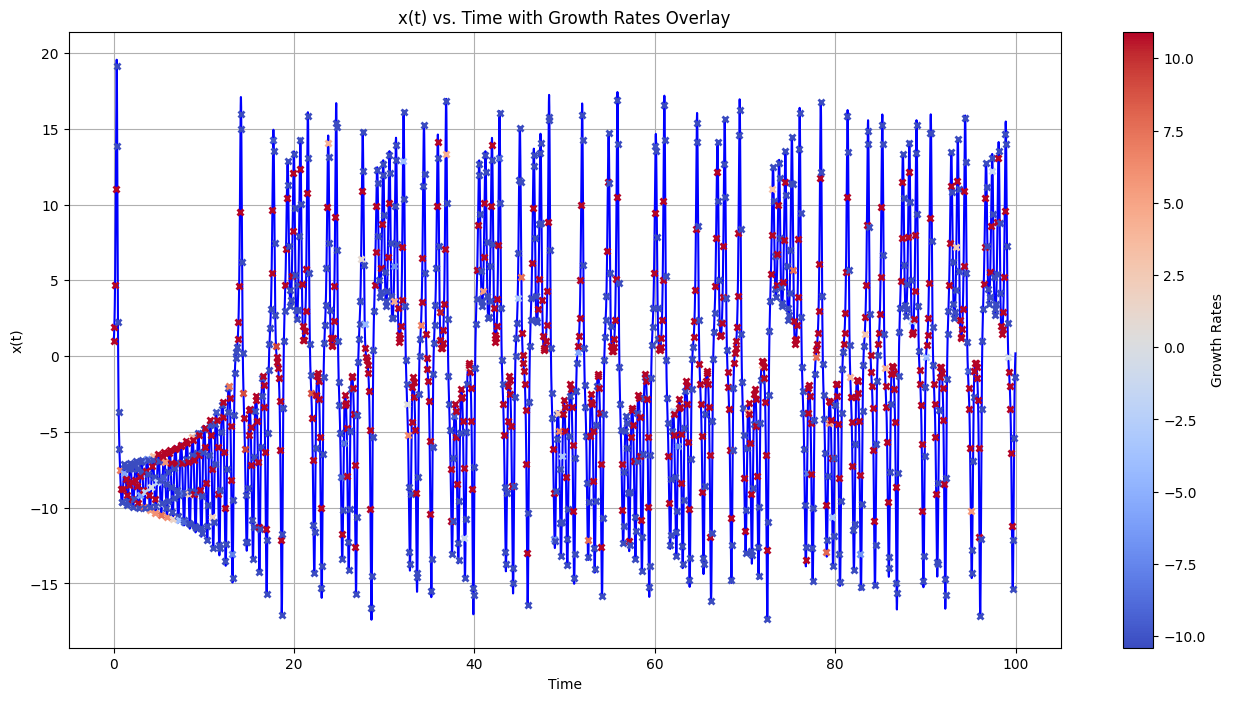

In [36]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(16, 8))
x_trajectory = xvalues[:10000]  # x trajectory
time_values = time[:10000]  # corresponding time values


# Plot x(t) vs. time
ax.plot(time_values, x_trajectory, label='x(t)', color='blue')

# Display crosses at each data point with the growth rate as color
for i in range(len(time_values)):
    if i % 8 == 0:
        color = plt.get_cmap('coolwarm')(growth_rates[i // 8])
        ax.plot(time_values[i], x_trajectory[i], 'x', markersize=5, mew=2, label=f'Growth Rate: {growth_rates[i // 8]:.2f}', color=color)

# Set axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('x(t)')
ax.set_title('Figure 29: x(t) vs. Time with Growth Rates Overlay')

# Display grid
ax.grid(True)

# Create a color bar for the growth rates
cbar = plt.colorbar(scatter, ax=ax, label='Growth Rates')


# Show the plot
plt.show()












From this graph, we can see most of the positive growth rate points (7.5 - 10)  are located near the bottom of the system. The red crosses shows bred vector growth and can be used to forecast the next orbit (i.e. flow from positive to negative). When crosses turn to pink blueish colour, this means that the pertubation is at an end. The blue crosses on the other hand (negative growth rates) shows that pertubations are decaying and it is at the end of the orbit cycle. In summary, two main patterns can be seen here relating to regime change and regime duration. For regime duration, after multiple red crosses in a row, this signifies a long lasting regime, For regime change, the prescence of red crosses means that the next orbit will be next last one in the present regime (8)

**ENSO** experiments

El Nino Southern Ocean Oscillation (ENSO) is a recurring climate pattern of irregular and chaotic patterns of wind and sea surface temperature variations occuring in the Southern Ocean and the Pacific Ocean (9). The bred vectors models can be used to model (ENSO) using coupled Lorenz equations (10). As ENSO invloves both the ocean and atmosphere, different coupled equations are needed to accurately predict and model the systems. Therefore, there is a fast and slow mode This is shown in the fast and slow equations below:

Fast Equation:
$\begin{array}{l}{{\frac{d x_{1}}{d t}=\sigma(y_{1}-x_{1})-C_{1}(S x_{2}+O)}}\\ {{\frac{d y_{1}}{d t}=r x_{1}-y_{1}-x_{1}z_{1}+C_{1}(S y_{2}+O)}}\\ {{\frac{d z_{1}}{d t}=x_{1}y_{1}-b z_{1}+C_{1}^{*}(S z_{2})}}\end{array}$

<br>

Slow Equation:
1/tau*
$\begin{array}{l}{{\frac{d x_{2}}{d t}=\sigma(y_{2}-x_{2})-C_{2}(x_{1}+O)}}\\ {{\frac{d y_{2}}{d t}=r x_{2}-y_{2}-x_{2}z_{2}+C_{1}(y_{1}+O)}}\\ {{\frac{d z_{1}}{d t}=x_{2}y_{2}-b z_{2}+C_{2}^{*}(z_{2})}}\end{array}$

Slow equation is basically 1/tau * the three equations to slow down the equation but because I don't know how to type formulas in jutyper notebook this is the best I can do.



 Ocean pertubations are often slower and during a normal and less frequent regime (such as normal times and El Nino events) so the slow equation is used. For atmospheric interactions with a lot of weather noise, the fast equation is used. Can and Zebiak used these breeding coupled models to predict ENSO signals and have achieved a hindcasat period of 9 months of El Nino events. (10).

###References
<br>1) Wangersky PJ. Lotka-Volterra population models. Annual Review of Ecology and Systematics. 1978 Nov;9(1):189-218.
<br> 2) Anisiu MC. Lotka, Volterra and their model. Didáctica mathematica. 2014;32(01).
<br>3) Bin Suleiman M. Solving nonstiff higher order ODEs directly by the direct integration method. Applied Mathematics and Computation. 1989 Oct 1;33(3):197-219.
<br>4) Hang, Russel. Three-Species Lotka-Volterra Model [Internet]. GitHub. 2023 [cited 2023 Nov 7]. Available from: https://github.com/RussH-code/Three-Species-Lotka-Volterra-Model
‌‌<br>5) Baines PG. Lorenz, EN 1963: Deterministic nonperiodic flow. Journal of the Atmospheric Sciences 20, 130–41.1. Progress in Physical Geography. 2008 Aug;32(4):475-80.
<br>6) Li JM, Wang YL, Zhang W. Numerical simulation of the Lorenz-type chaotic system using Barycentric Lagrange interpolation collocation method. Advances in Mathematical Physics. 2019 Apr
<br>7) THREE DIMENSIONAL SYSTEMS Lecture 6: The Lorenz Equations [Internet]. Available from: https://www2.physics.ox.ac.uk/sites/default/files/profiles/read/lect6-43147.pdf
<br>8) Kalnay E, Yang SC, Peña M, Cai M, Hoffman M. Bred Vectors: A simple tool to understand complex dynamics [Internet]. [cited 2023 Nov 8]. Available from: https://www2.atmos.umd.edu/~ekalnay/pubs/ArakawaSymposiumKalnay.ppt.pdf
‌<br>9) Kalnay E, Peña M, Yang SC, Cai M. Breeding and predictability in coupled Lorenz models. InProceedings of the ECMWF Seminar on Predictability 2002 Sep 9 (pp. 9-13).
<br>10) Zebiak, S.E. and Cane, M.A., 1991. Natural climate variability in a coupled model. In Developments in atmospheric science (Vol. 19, pp. 457-469). Elsevier.